In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import fiona

In [2]:
fiona.supported_drivers['KML'] = 'rw'

In [3]:
gdf = gpd.read_file('./Buildings.geojson')

In [4]:
gdf

,x_coordinate,building_height_highest_floor,construction_year,accessibility_rating,property_id,suburb,predominant_space_use,has_showers,building_name,census_year,y_coordinate,refurbished_year,block_id,street_address,accessibility_type,base_property_id,bicycle_spaces,accessibility_type_description,geometry
0,144.9739,2,None,None,100825,Carlton,House/Townhouse,None,None,2002,-37.8002,None,237,14 Barrup Street CARLTON 3053,None,100825,None,None,POINT (144.97390 -37.80020)
1,144.9212,2,None,None,105047,Kensington,House/Townhouse,None,None,2002,-37.7906,None,569,64-66 Howlett Street KENSINGTON 3031,None,105047,None,None,POINT (144.92120 -37.79060)
2,144.9483,2,None,None,102380,North Melbourne,Office,None,None,2002,-37.8031,None,345,62 Curzon Street NORTH MELBOURNE 3051,None,102380,None,None,POINT (144.94830 -37.80310)
3,144.9535,1,1910,None,105018,North Melbourne,Office,None,None,2002,-37.8048,None,356,93 Howard Street NORTH MELBOURNE 3051,None,105018,None,None,POINT (144.95350 -37.80480)
4,144.9856,2,None,None,100388,South Yarra,House/Townhouse,None,None,2002,-37.8289,None,853,9-11 Alexandra Avenue SOUTH YARRA 3141,None,100388,None,None,POINT (144.98560 -37.82890)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235096,144.9489861,1,None,0,102365,North Melbourne,House/Townhouse,None,None,2019,-37.79989722,None,349,138 Curzon Street NORTH MELBOURNE 3051,Not determined or not applicable,102365,None,Building is not considered to be publicly acce...,POINT (144.94899 -37.79990)
235097,144.9568113,39,1991,2,102115,Melbourne (CBD),Office,TRUE,530 Collins,2019,-37.81770351,2009,32,522-534 Collins Street MELBOURNE 3000,Moderate level of accessibility,102115,100,Main entrance has steps; Alternative entrance ...,POINT (144.95681 -37.81770)
235098,144.9737918,29,1989,3,108975,Melbourne (CBD),Office,TRUE,Shell House,2019,-37.8149934,None,18,1-9 Spring Street MELBOURNE 3000,High level of accessibility,108975,100,Main Entrance is at grade and has no steps or ...,POINT (144.97379 -37.81499)
235099,144.9403914,2,2006,0,608457,Parkville,House/Townhouse,None,None,2019,-37.77709367,None,928,42 Strickland Road PARKVILLE 3052,Not determined or not applicable,608457,None,Building is not considered to be publicly acce...,POINT (144.94039 -37.77709)


In [5]:
mel = gdf[gdf['suburb'] == 'Melbourne (CBD)']

In [20]:
mel

,building_height_highest_floor,construction_year,accessibility_rating,property_id,suburb,predominant_space_use,has_showers,building_name,census_year,refurbished_year,block_id,street_address,accessibility_type,base_property_id,bicycle_spaces,accessibility_type_description,geometry
5,2,1901,None,104216,Melbourne (CBD),Office,None,None,2003,None,27,27 George Parade MELBOURNE 3000,None,104216,None,NaN,POINT (144.97010 -37.81490)
6,3,1993,None,105689,Melbourne (CBD),Office,None,None,2003,None,66,201 Lonsdale Street MELBOURNE 3000,None,105689,None,NaN,POINT (144.96650 -37.81130)
11,1,None,None,580227,Melbourne (CBD),Community Use,None,None,2006,None,37,77 Exhibition Street MELBOURNE 3000,None,580227,None,NaN,POINT (144.97140 -37.81380)
39,4,1920,None,105706,Melbourne (CBD),Unoccupied - Unused,None,None,2003,1990,64,389-395 Lonsdale Street MELBOURNE 3000,None,105706,None,NaN,POINT (144.96100 -37.81290)
49,14,1990,None,110665,Melbourne (CBD),Office,None,CHALLENGE BANK TOWER,2003,1997,22,459 Collins Street MELBOURNE 3000,None,110661,None,NaN,POINT (144.95890 -37.81820)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235057,4,1920,1,105860,Melbourne (CBD),Residential Apartment,None,None,2019,2000,62,562-566 Little Bourke Street MELBOURNE 3000,Low level of accessibility,105860,0,All entrances have steps,POINT (144.95567 -37.81502)
235060,2,1853,1,110721,Melbourne (CBD),Unoccupied - Unused,None,Former Oddfellows Hotel,2019,2012,78,33-39 Little Lonsdale Street MELBOURNE 3000,Low level of accessibility,580091,0,All entrances have steps,POINT (144.97073 -37.80920)
235095,5,1937,2,606646,Melbourne (CBD),Educational/Research,None,Building 9,2019,2008,96,124 La Trobe Street MELBOURNE 3000,Moderate level of accessibility,105490,0,Main entrance has steps; Alternative entrance ...,POINT (144.96455 -37.80818)
235097,39,1991,2,102115,Melbourne (CBD),Office,TRUE,530 Collins,2019,2009,32,522-534 Collins Street MELBOURNE 3000,Moderate level of accessibility,102115,100,Main entrance has steps; Alternative entrance ...,POINT (144.95681 -37.81770)


In [26]:
mel['has_showers'] = mel['has_showers'].astype('bool')
mel['accessibility_type'] = mel['accessibility_type'].astype('category')

In [15]:
mel['geometry'] = gpd.points_from_xy(mel.x_coordinate, mel.y_coordinate)

In [18]:
mel.drop('x_coordinate', inplace=True, axis=1)
mel.drop('y_coordinate', inplace=True, axis=1)

C:\Users\thier\anaconda3\envs\AG\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
mel.dtypes

building_height_highest_floor       object
construction_year                   object
accessibility_rating                object
property_id                         object
suburb                              object
predominant_space_use               object
has_showers                           bool
building_name                       object
census_year                         object
refurbished_year                    object
block_id                            object
street_address                      object
accessibility_type                category
base_property_id                    object
bicycle_spaces                      object
accessibility_type_description    category
geometry                          geometry
dtype: object

<AxesSubplot:>

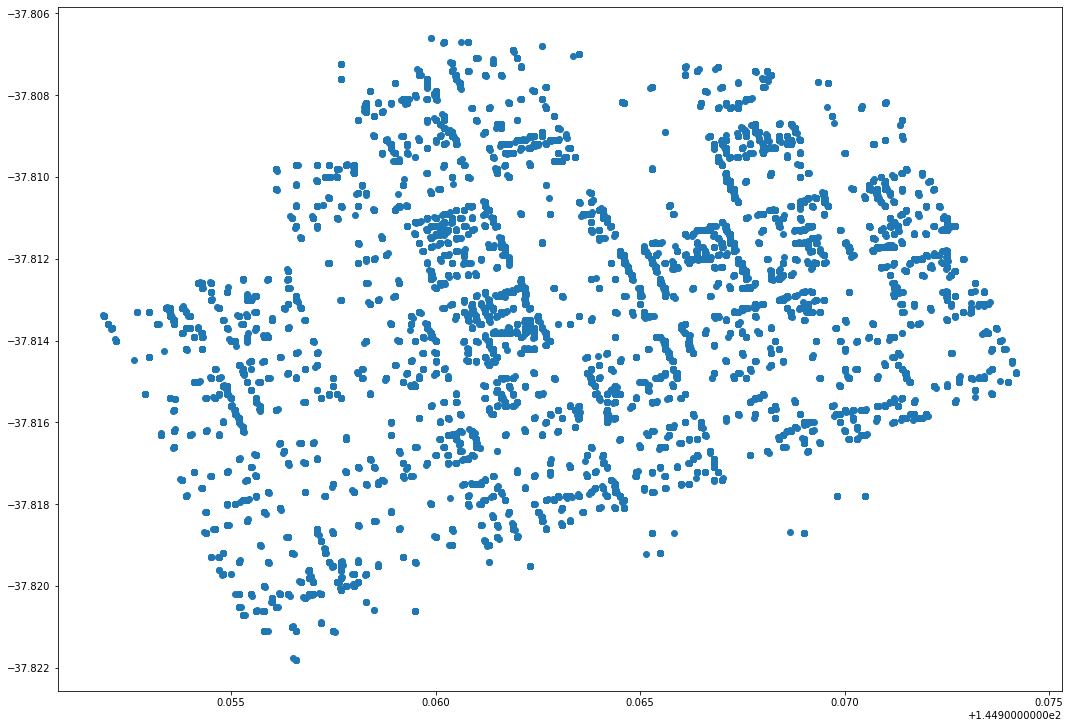

In [30]:
mel.plot(figsize=(18, 18), alpha = 1)